In [2]:
'''
/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/test_images/cautleya_spicata.jpg

/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/workspace/label_map.json

/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/1588939321h.h5
'''

'\n/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/test_images/cautleya_spicata.jpg\n\n/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/workspace/label_map.json\n\n/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/1588939321h.h5\n'

In [3]:
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import tensorflow_hub as hub

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


In [98]:
def predict(image_path, model, top_k):
    im = Image.open(image_path)
    numpy_image = np.asarray(im)
    image = process_image(numpy_image)
    image = np.expand_dims(image , 0 )
    prediction = model.predict(image)
    classes_unsorted = np.argpartition(prediction[0], -top_k)[-top_k:] 
    probs_unsorted = prediction[0][classes_unsorted] 
    classes_unsorted = classes_unsorted +1
    probs =[a for a,b in sorted(zip(probs_unsorted,classes_unsorted))]
    classes =[b for a,b in sorted(zip(probs_unsorted,classes_unsorted))]
    return probs, classes 


In [5]:
def process_image (image) :
    IMG_SIZE = 224
    tensor_image = tf.convert_to_tensor(image)
    tensor_image = tf.cast(tensor_image, tf.float32)
    tensor_image = tf.image.resize(tensor_image, (IMG_SIZE,IMG_SIZE ))
    tensor_image /= 255
    image = tensor_image.numpy()
    return image

In [6]:
print ( 'please enter your image path to be classified :' )
with open(input() , 'r') as input_file:
    print(input_file)

please enter your image path to be classified :
/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/test_images/cautleya_spicata.jpg
<_io.TextIOWrapper name='/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/test_images/cautleya_spicata.jpg' mode='r' encoding='UTF-8'>


In [7]:
flower = input_file.name 

In [8]:
import json
print ( 'please enter your json file path for labels:' )

with open(input(), 'r') as f:
    class_names = json.load(f)

please enter your json file path for labels:
/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/workspace/label_map.json


In [9]:
print ( 'please enter your model path :' )
with open(input() , 'r') as model:
    print(model)
    


please enter your model path :
/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/1588939321h.h5
<_io.TextIOWrapper name='/Users/nasim/Documents/Udacity/intro-to-ml-tensorflow/projects/p2_image_classifier/1588939321h.h5' mode='r' encoding='UTF-8'>


In [10]:
user_input = input("Enter your top n class to be shown in prediction")
try:
    top_k = int(user_input)
    print("Input is an integer number. Number = ", top_k)
except ValueError:
    print("No.. input is not an integer.Value Five would be taken")
    top_k = 5

Enter your top n class to be shown in prediction7
Input is an integer number. Number =  7


In [11]:
saved_keras_model_filepath =  model.name  

In [12]:
reloaded_keras_model = tf.keras.models.load_model(saved_keras_model_filepath , custom_objects={'KerasLayer':hub.KerasLayer})

reloaded_keras_model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1280)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 256)               327936    
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 102)               26214     
Total params: 2,612,134
Trainable params: 354,150
Non-trainable params: 2,257,984
_________________________________________________________________


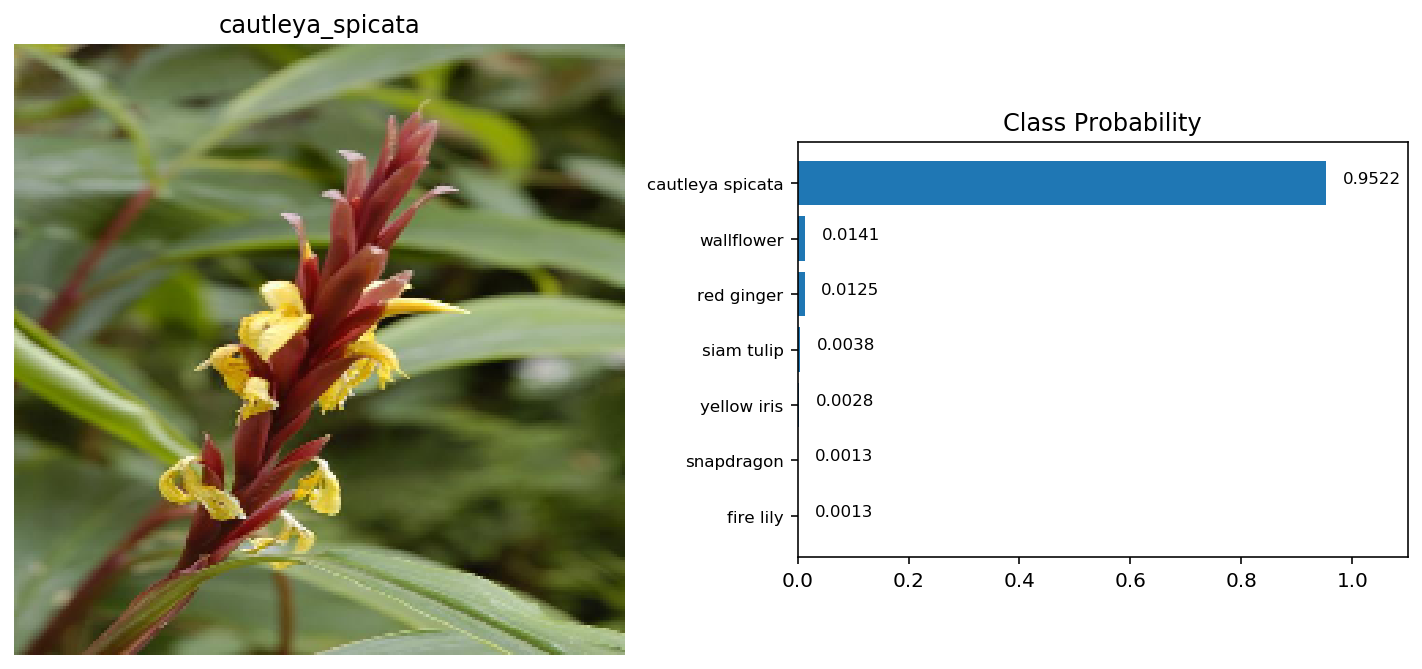

In [101]:

im = Image.open(flower)
test_image = np.asarray(im)
processed_test_image = process_image(test_image)

probs , classes = predict(flower, reloaded_keras_model, top_k)
keys = [x for y,x in sorted(zip(probs,classes))]
fig, (ax1, ax2) = plt.subplots(figsize=(10,12), ncols=2)
ax1.imshow(processed_test_image, cmap = plt.cm.binary)
ax1.axis('off')
import os
title = os.path.splitext(os.path.split(flower)[-1])[0]
ax1.set_title(title)
#probs.sort()
ax2.barh(np.arange(top_k), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(top_k))
label_class = [class_names.get(str(key)) for key in classes]
ax2.set_yticklabels(label_class , size='small');
for i, v in enumerate(probs):
    ax2.text(v + 0.03 , i , str(v)[:6], color='black', size='small')

ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()



In [110]:
print(zip(label_class, probs))
print ('print :--------->top %s' %top_k)
np.vstack((classes ,label_class, probs)).T

print :--------->top 7


array([['21', 'fire lily', '0.001324481'],
       ['11', 'snapdragon', '0.0013683961'],
       ['15', 'yellow iris', '0.0028301496'],
       ['39', 'siam tulip', '0.0038966995'],
       ['24', 'red ginger', '0.01252611'],
       ['46', 'wallflower', '0.014161873'],
       ['61', 'cautleya spicata', '0.9522596']], dtype='<U32')

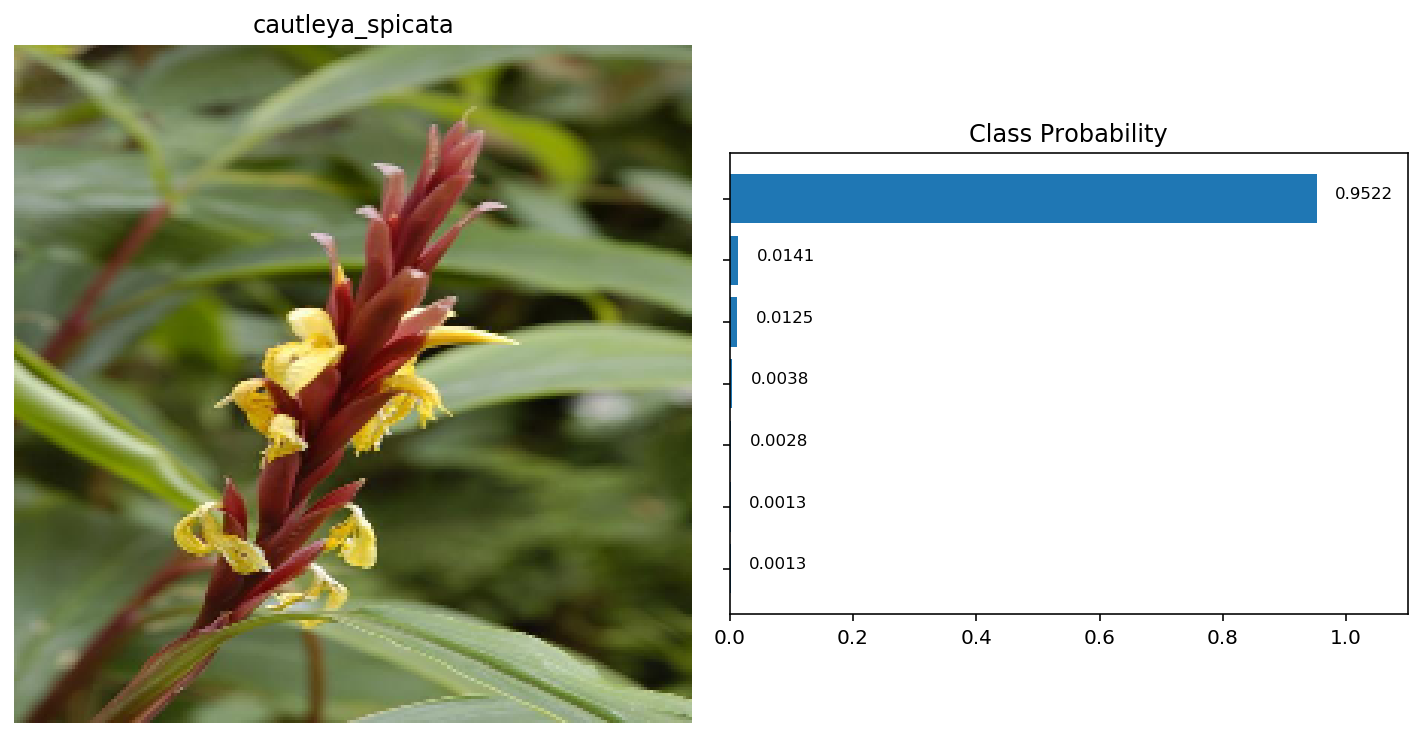

In [95]:

im = Image.open(flower)
test_image = np.asarray(im)
processed_test_image = process_image(test_image)

probs , classes = predict(flower, reloaded_keras_model, top_k)

keys = classes 
fig, (ax1, ax2) = plt.subplots(figsize=(10,12), ncols=2)
ax1.imshow(processed_test_image, cmap = plt.cm.binary)
ax1.axis('off')
import os
title = os.path.splitext(os.path.split(flower)[-1])[0]
ax1.set_title(title)
ax2.barh(np.arange(top_k), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(top_k))
ax2.set_yticklabels([class_names.get(str(key)) for key in classes], size='small');
for i, v in enumerate(probs):
    ax2.text(v + 0.03 , i , str(v)[:6], color='black', size='small')

ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

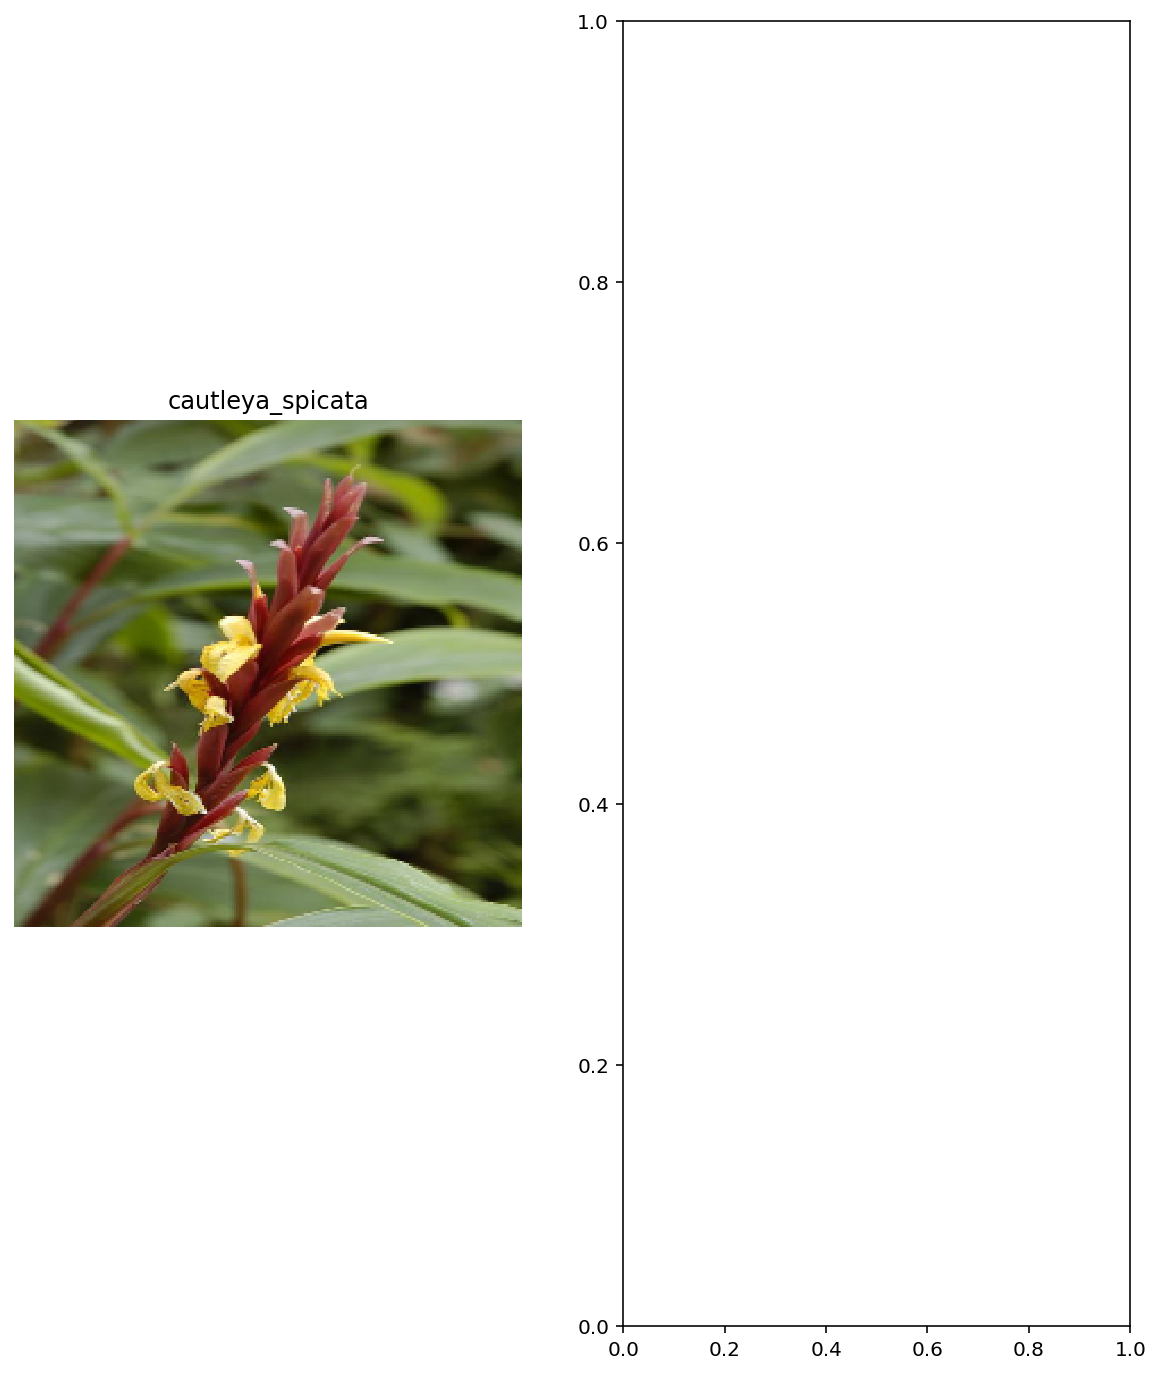

In [22]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,12), ncols=2)
ax1.imshow(processed_test_image, cmap = plt.cm.binary)
ax1.axis('off')
import os
title = os.path.splitext(os.path.split(flower)[-1])[0]
ax1.set_title(title)
ax2.barh(np.arange(top_k), probs)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(5))
ax2.set_yticklabels([class_names.get(str(key)) for key in classes], size='small');
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
plt.tight_layout()


In [97]:
probs , classes 


([0.001324481,
  0.0013683961,
  0.0028301496,
  0.0038966995,
  0.01252611,
  0.014161873,
  0.9522596],
 [0.001324481,
  0.0013683961,
  0.0028301496,
  0.0038966995,
  0.01252611,
  0.014161873,
  0.9522596])

In [16]:
test_image = np.asarray(im)
test_image

array([[[147, 158,  66],
        [148, 158,  69],
        [150, 160,  71],
        ...,
        [ 99, 120,  79],
        [ 97, 118,  77],
        [ 96, 117,  76]],

       [[148, 158,  69],
        [149, 159,  70],
        [150, 160,  71],
        ...,
        [102, 123,  82],
        [101, 122,  81],
        [100, 121,  80]],

       [[148, 156,  70],
        [149, 157,  71],
        [151, 159,  73],
        ...,
        [107, 128,  87],
        [106, 127,  86],
        [104, 125,  84]],

       ...,

       [[107, 122,  83],
        [104, 119,  80],
        [102, 114,  76],
        ...,
        [151, 170, 124],
        [152, 171, 125],
        [152, 171, 125]],

       [[105, 120,  81],
        [104, 116,  78],
        [100, 112,  74],
        ...,
        [157, 175, 133],
        [158, 176, 134],
        [159, 177, 135]],

       [[107, 119,  81],
        [104, 116,  78],
        [101, 111,  74],
        ...,
        [162, 178, 141],
        [163, 179, 142],
        [163, 179, 142]]

In [17]:
probs , classes = predict(flower, reloaded_keras_model, 5)


In [30]:
str(v)[:6]

'0.0013'

In [37]:
probs

array([0.00132448, 0.01252611, 0.9522596 , 0.00283015, 0.01416187,
       0.0038967 , 0.0013684 ], dtype=float32)

In [39]:
print(probs.sort())

None


In [42]:
probs ,classes

(array([0.00132448, 0.0013684 , 0.00283015, 0.0038967 , 0.01252611,
        0.01416187, 0.9522596 ], dtype=float32),
 array([21, 24, 61, 15, 46, 39, 11]))

In [66]:
Z = [x for y,x in sorted(zip(probs,classes))]

In [70]:
Z

[21, 11, 15, 39, 24, 46, 61]

In [55]:
sorted(zip(probs,classes))

[(0.001324481, 21),
 (0.0013683961, 11),
 (0.0028301496, 15),
 (0.0038966995, 39),
 (0.01252611, 24),
 (0.014161873, 46),
 (0.9522596, 61)]

In [71]:
sorted(zip(classes,probs))

[(11, 0.0013683961),
 (15, 0.0028301496),
 (21, 0.001324481),
 (24, 0.01252611),
 (39, 0.0038966995),
 (46, 0.014161873),
 (61, 0.9522596)]

In [63]:
sorted(zip(probs,classes))

[(0.001324481, 21),
 (0.0013683961, 11),
 (0.0028301496, 15),
 (0.0038966995, 39),
 (0.01252611, 24),
 (0.014161873, 46),
 (0.9522596, 61)]

In [85]:
a = [1,5,7,9,2,3,4,6]

In [78]:
b = ["c","d","e","f","g","h","i" ,'j']

In [79]:
sorted(zip(a,b))

[(1, 'c'),
 (2, 'g'),
 (3, 'h'),
 (4, 'i'),
 (5, 'd'),
 (6, 'j'),
 (7, 'e'),
 (9, 'f')]

In [87]:
c=[a for a,b in sorted(zip(a,b))]
c

[1, 2, 3, 4, 5, 6, 7, 9]

In [88]:
d=[b for a,b in sorted(zip(a,b))]
d

['c', 'g', 'h', 'i', 'd', 'j', 'e', 'f']

In [108]:
class_names

{'21': 'fire lily',
 '3': 'canterbury bells',
 '45': 'bolero deep blue',
 '1': 'pink primrose',
 '34': 'mexican aster',
 '27': 'prince of wales feathers',
 '7': 'moon orchid',
 '16': 'globe-flower',
 '25': 'grape hyacinth',
 '26': 'corn poppy',
 '79': 'toad lily',
 '39': 'siam tulip',
 '24': 'red ginger',
 '67': 'spring crocus',
 '35': 'alpine sea holly',
 '32': 'garden phlox',
 '10': 'globe thistle',
 '6': 'tiger lily',
 '93': 'ball moss',
 '33': 'love in the mist',
 '9': 'monkshood',
 '102': 'blackberry lily',
 '14': 'spear thistle',
 '19': 'balloon flower',
 '100': 'blanket flower',
 '13': 'king protea',
 '49': 'oxeye daisy',
 '15': 'yellow iris',
 '61': 'cautleya spicata',
 '31': 'carnation',
 '64': 'silverbush',
 '68': 'bearded iris',
 '63': 'black-eyed susan',
 '69': 'windflower',
 '62': 'japanese anemone',
 '20': 'giant white arum lily',
 '38': 'great masterwort',
 '4': 'sweet pea',
 '86': 'tree mallow',
 '101': 'trumpet creeper',
 '42': 'daffodil',
 '22': 'pincushion flower',
 